# Colleges-Outcomes: Bar and Scatter with Pandas

The dataset is about job outcomes of students who graduated from american college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, https://www.census.gov/programs-surveys/acs/, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo: https://github.com/fivethirtyeight/data/tree/master/college-majors

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

Description of the dataset: https://github.com/fivethirtyeight/data/tree/master/college-majors

## First Steps in explorating the dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as plotting

In [21]:
recent_grads = pd.read_csv('data/recent-grads.csv')

In [22]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [23]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [24]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


* Let's generate summary statistics for all of the numeric columns:

In [25]:
recent_grads.iloc[:,3:].describe()

,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


For numeric dtypes, it will include: count, mean, std, min, max, and lower, 50, and upper percentiles.

You can already notice that the count of values for each column is different, and deduce that some values are missing.


In [26]:
raw_data_count = recent_grads.shape[0]

Let's drop the rows (axis=0) where one or more values are nan (not a number): 

The default parameters are set as follows:

* DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [27]:
recent_grads = recent_grads.dropna()

In [28]:
recent_grads.shape[0]

172

In [29]:
raw_data_count

173

* You can deduce that only one row contained missing values and was dropped.

## Exploring Correlations between variables

A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval. Correlations may be positive (rising), negative (falling), or null (uncorrelated). 

If the pattern of dots slopes from lower left to upper right, it indicates a positive correlation between the variables being studied. If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation.

* Use the plots to explore the following questions:
    * Do students in more popular majors make more money ('Total' vs 'Median')?
    * Do students that majored in subjects that were majority female make less money ('ShareWomen' vs 'Median')?
    * Is there any link between the number of full-time employees and median salary ('Full_time' vs 'Median')?

**Note** 
* 'Sample_size': the sample size used for calculating the median earnings of full-time, year-round workers.
* 'Median':	Median earnings of full-time, year-round workers

## Do students in more popular majors make more money?

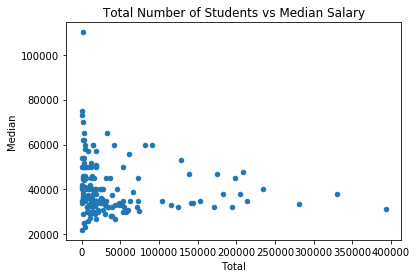

In [47]:
recent_grads.plot('Total', 'Median', kind='scatter', title='Total Number of Students vs Median Salary')
plt.show()

Let's go further in splitting the total number of employees (less than 75 000 and more than 75 000) and see if we can figure out a link.

### Total is less than 75 000

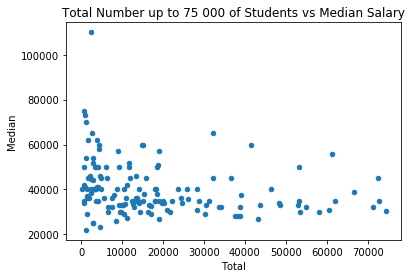

In [44]:
recent_grads[recent_grads['Total']<=75000].plot('Total', 'Median', kind='scatter', title='Total Number up to 75 000 of Students vs Median Salary')
plt.show()

### Total is more than 75 000

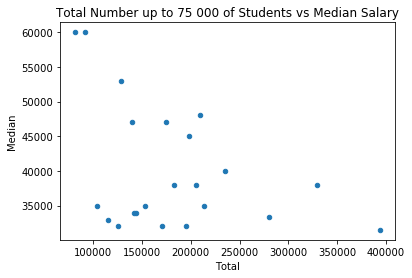

In [46]:
recent_grads[recent_grads['Total']>75000].plot('Total', 'Median', kind='scatter', title='Total Number up to 75 000 of Students vs Median Salary')
plt.show()

Neither line pattern (no correlation) nor curve pattern (link) appear in the scatter plot. We can conclude that there is no link between the popularity of the major (the more there are students in the major, the more popular the major is) and median salary.

## Do students that majored in subjects that were majority female make less money?

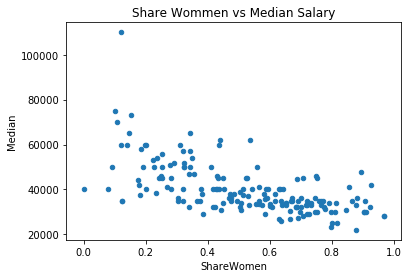

In [39]:
recent_grads.plot('ShareWomen', 'Median', kind='scatter', title='Share Wommen vs Median Salary')
plt.show()

The scatter plot representing 'ShareWomen' vs 'Median' shows there is a correlation: the pattern of dots slopes from upper left to lower right indicates a negative correlation. We can conclude that students that majored in subjects that were majority female make less money. We can make different hypothesis:
* Women make less money than men for equivalent roles. 
* Women choose major category corresponding to lower median salaries. (More men in engineering majors which generate upper incomes).

## Is there any link between the number of full-time employees and median salary?

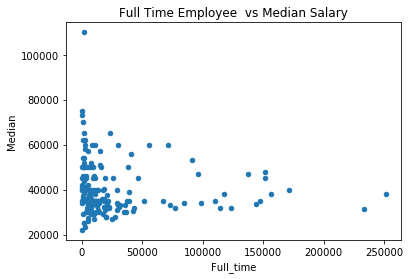

In [40]:
recent_grads.plot('Full_time', 'Median', kind='scatter', title='Full Time Employee  vs Median Salary')
plt.show()

Let's go further in splitting the number of full time employees (less than 50 000 and more than 50000) and see if we can figure out a link.

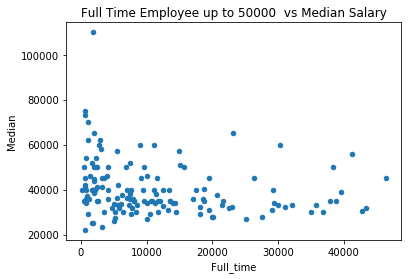

In [41]:
recent_grads[recent_grads['Full_time']<=50000].plot('Full_time', 'Median', kind='scatter', title='Full Time Employee up to 50000  vs Median Salary')
plt.show()

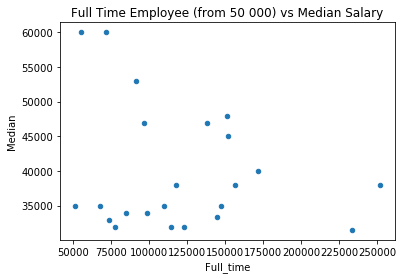

In [42]:
recent_grads[recent_grads['Full_time']>50000].plot('Full_time', 'Median', kind='scatter', title='Full Time Employee (More than 50 000) vs Median Salary')
plt.show()

Neither line pattern (no correlation) nor curve pattern (link) appear in the scatter plot. We can conclude that there is no link between the number of full-time employees and median salary.

## Histogram

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a **continuous** variable.

Let's select the continuous variables fron our dataset and plot the corresponding histograms:

**Note**

A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables.

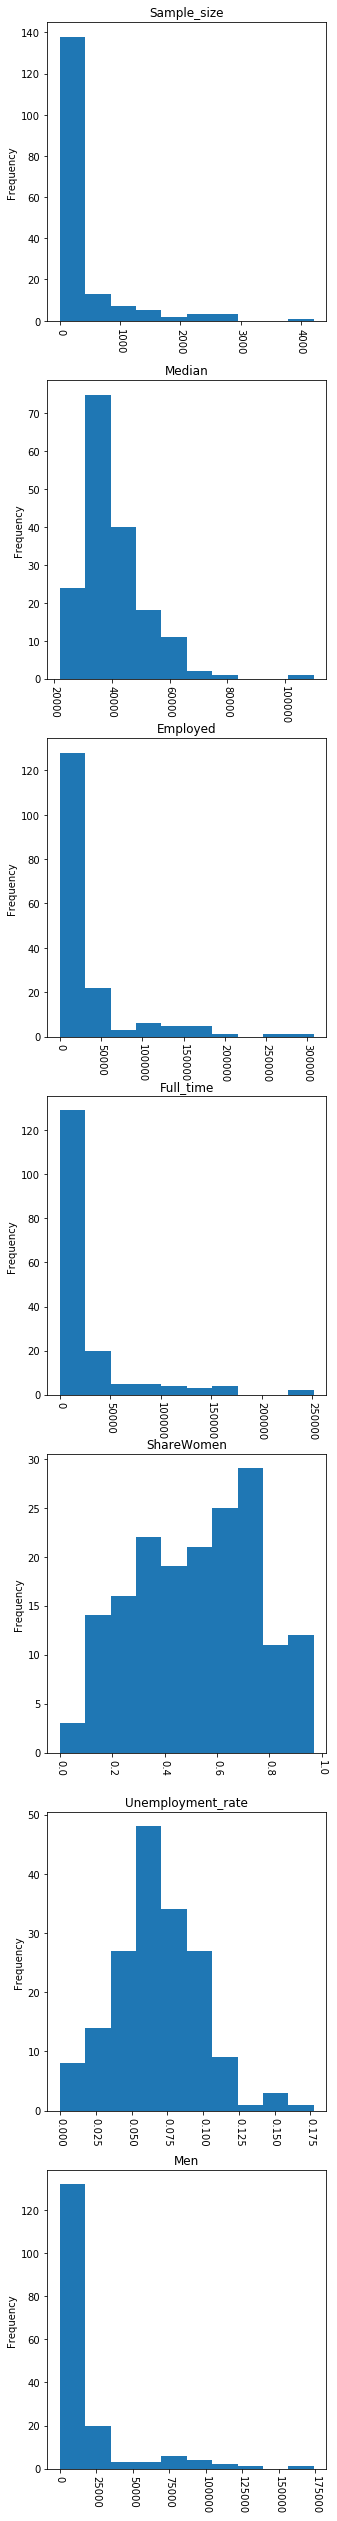

In [80]:
cols = ['Sample_size', 'Median','Employed','Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(5,45))
for i in range(7):
    ax = fig.add_subplot(7,1,i+1)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=-90)
    ax.set_title(cols[i])

The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


* Symmetric. A histogram is symmetric if you cut it down the middle and the left-hand and right-hand sides are mirror images of each other.
* Skewed left. If a histogram is skewed left, it looks like a lopsided mound with a tail going off to the left.
* Skewed right. A skewed right histogram looks like a lopsided mound, with a tail going off to the right.

# Scatter Matrix

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

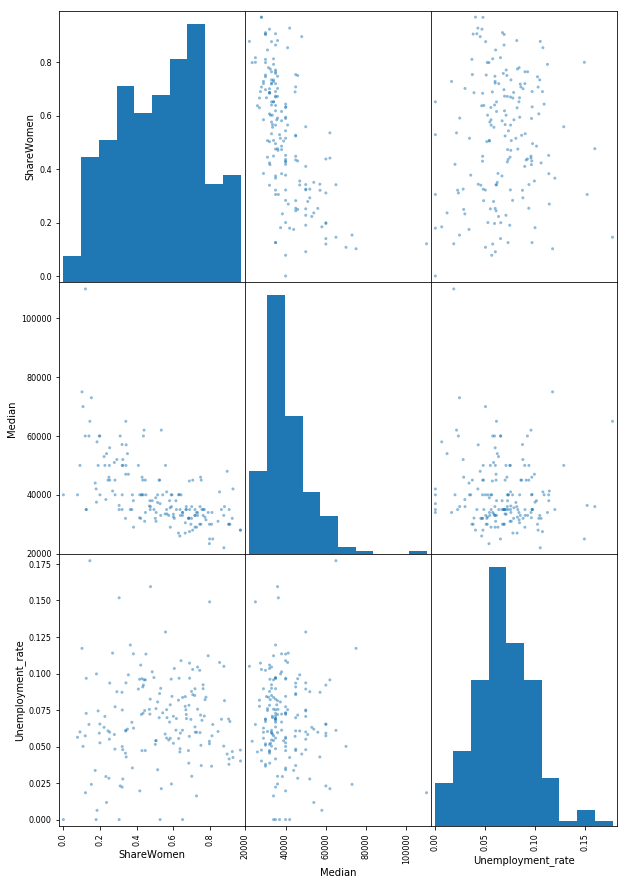

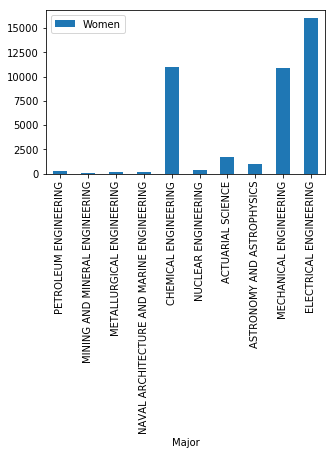

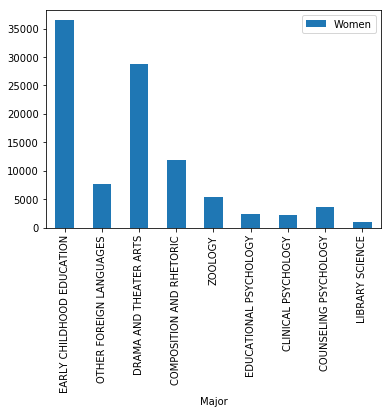

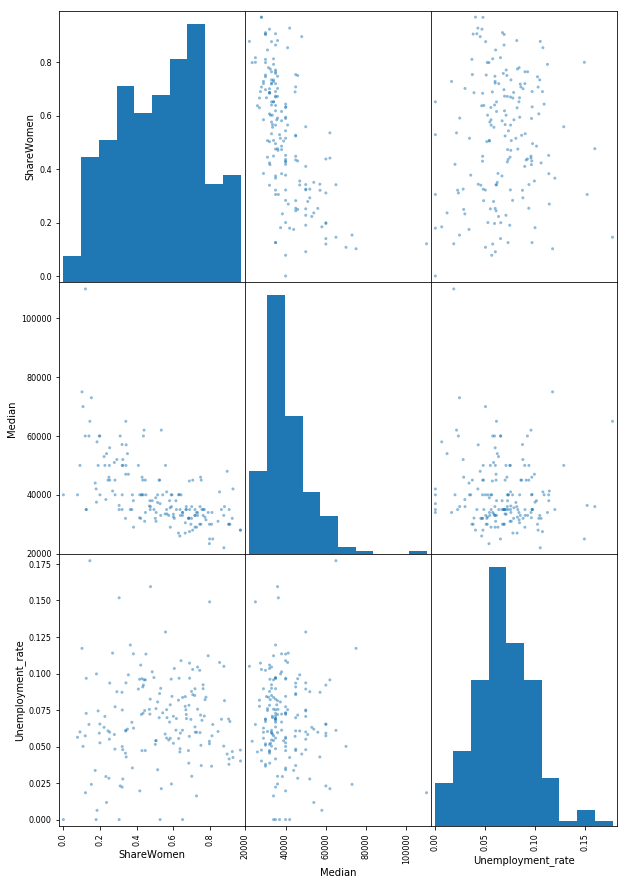

In [51]:
plotting.scatter_matrix(recent_grads[['ShareWomen', 'Median', 'Unemployment_rate']], figsize=(10,15))
plt.show()

# Let's go further to explore hypothesis about the link between sharewomen and income using bar plots:

We already notice that there is a negative correlation between the sharewomen and the income.

Let's try to figure out of the following hypothesis is true: Women choose major category corresponding to lower median salaries. 

http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
    

Let's compare the number of women (ShareWomen) from the 10 highest paying majors

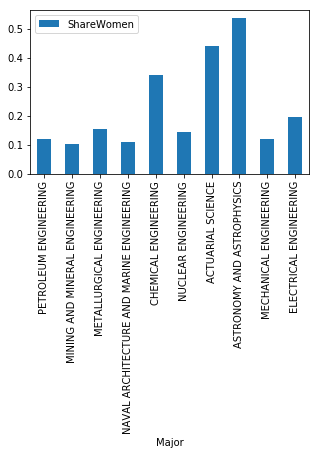

In [54]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', figsize=(5,3))
plt.show()

Comparing the percentages of women (ShareWomen) from the 10 lowest paying majors

In [50]:
recent_grads[163:].plot.bar(x='Major', y='Women')

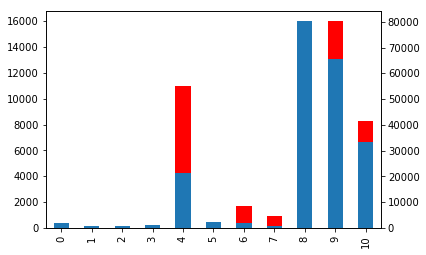

In [104]:
#recent_grads[:10].plot.bar(x='Major', y='Women')
recent_grads.loc[:10,'Women'].plot.bar(x='Major', y='Women', color='r')
recent_grads.loc[:10,'Men'].plot.bar(x='Major', secondary_y=True, y='Men')

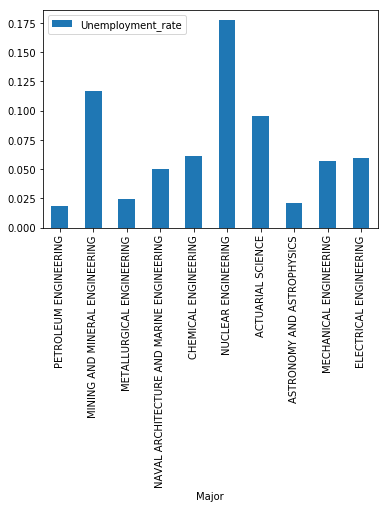

In [91]:
ax = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

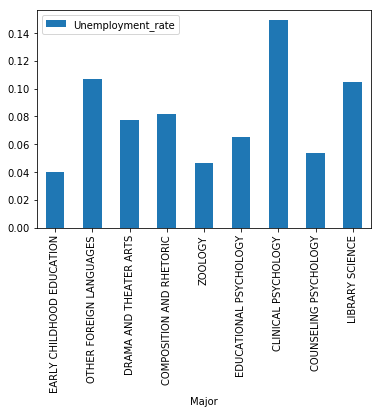

In [94]:
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate')

In [93]:
plt.show()